In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from datetime import datetime

sns.set_style("whitegrid")

Part A: studying the full dataset

In [2]:
az = pd.read_csv('AZFullDataset.csv')
az

,case_month,res_state,state_fips_code,res_county,county_fips_code,age_group,sex,race,ethnicity,case_positive_specimen_interval,case_onset_interval,process,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn
0,2021-10,AZ,4,PINAL,4021.0,0 - 17 years,Female,Missing,Hispanic/Latino,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,Missing,NaN
1,2020-12,AZ,4,MARICOPA,4013.0,65+ years,Female,American Indian/Alaska Native,Hispanic/Latino,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Yes,Missing,NaN,NaN
2,2020-06,AZ,4,SANTA CRUZ,4023.0,18 to 49 years,Male,Missing,Hispanic/Latino,NaN,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,No,Missing,No,NaN
3,2021-09,AZ,4,NaN,NaN,18 to 49 years,Male,Missing,Missing,NaN,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,No,Missing,No,NaN
4,2021-01,AZ,4,PIMA,4019.0,50 to 64 years,Male,American Indian/Alaska Native,Hispanic/Latino,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Missing,No,Missing,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1160740,2021-01,AZ,4,NaN,NaN,18 to 49 years,Female,White,Non-Hispanic/Latino,NaN,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,Missing,Missing,No,NaN
1160741,2021-01,AZ,4,NaN,NaN,18 to 49 years,Female,White,Non-Hispanic/Latino,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,No,NaN
1160742,2021-01,AZ,4,NaN,NaN,18 to 49 years,Female,White,Non-Hispanic/Latino,0.0,NaN,Missing,Missing,Probable Case,Asymptomatic,No,Missing,Missing,NaN
1160743,2021-01,AZ,4,NaN,NaN,18 to 49 years,Female,White,Non-Hispanic/Latino,NaN,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,Unknown,Missing,No,NaN


In [3]:
#Cleaning the dataset
az['hosp_yn'].loc[az['hosp_yn'] == 'Missing'] = 'No'
az['age_group'].loc[az['age_group'] == 'Missing']= np.nan

C:\Users\iamdo\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [4]:
az = az.dropna(subset=['age_group'])
az = az[['case_month', 'age_group','hosp_yn']]

In [5]:
az.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1157034 entries, 0 to 1160744
Data columns (total 3 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   case_month  1157034 non-null  object
 1   age_group   1157034 non-null  object
 2   hosp_yn     1157034 non-null  object
dtypes: object(3)
memory usage: 22.1+ MB


In [6]:
months = az['case_month'].unique()

Formatting the dataset to develop graphs:

In [7]:
months

array(['2021-10', '2020-12', '2020-06', '2021-09', '2021-01', '2020-07',
       '2021-04', '2021-07', '2020-09', '2020-05', '2021-02', '2020-11',
       '2020-08', '2021-08', '2021-03', '2020-10', '2021-06', '2021-05',
       '2020-03', '2020-04'], dtype=object)

In [8]:
ages = az['age_group'].unique()
ages

array(['0 - 17 years', '65+ years', '18 to 49 years', '50 to 64 years'],
      dtype=object)

In [9]:
'''
count the number of covid cases for the given age group

Parameters:

    age:string of the name of the age group
    df: dataframe

'''
def sumCount(age, df):
    list = []
    for i in range(len(months)):
        list.append(len(df[(df['case_month'] == months[i]) & (df['age_group'] == age)]))
    return list

In [10]:
'''
count the number of hospitalization for the given age group

Parameters:

    age:string of the name of the age group
    df: dataframe

'''
def hospCount(age, df):
    list = []
    for i in range(len(months)):
        list.append(len(df[(df['case_month'] == months[i]) & (df['age_group'] == age) 
                          &(df['hosp_yn'] == 'Yes')]))
    return list

In [11]:
'''
count the number of non-hospitalizations for the given age group

Parameters:

    age:string of the name of the age group
    df: dataframe

'''
def nonhospCount(age, df):
    list = []
    for i in range(len(months)):
        list.append(len(df[(df['case_month'] == months[i]) & (df['age_group'] == age) 
                          &(df['hosp_yn'] == 'No')]))
    return list

In [12]:
'''
calculates the hospitalization / covid cases rates for the given age group

parameters:

    age:string of the name of the age group
    df: dataframe

'''
def hospRate(age, df):
    list = []
    for i in range(len(months)):
        hospCount = len(df[(df['case_month'] == months[i]) & (df['age_group'] == age) 
                          &(df['hosp_yn'] == 'Yes')])
        caseCount = len(df[(df['case_month'] == months[i]) & (df['age_group'] == age)])
        list.append(hospCount/caseCount)
    return list

In [13]:
data = {'month':  months,
        '0-17':sumCount('0 - 17 years',az),
        '0-17hosp': hospCount('0 - 17 years', az),
        '0-17nonhosp': nonhospCount('0 - 17 years', az),
        '0-17hospRate': hospRate('0 - 17 years', az),
        '18-49': sumCount('18 to 49 years', az),
        '18-49hosp': hospCount('18 to 49 years', az),
        '18-49nonhosp': nonhospCount('18 to 49 years', az),
        '18-49hospRate': hospRate('18 to 49 years', az),
        '50-64': sumCount('50 to 64 years', az),
        '50-64hosp': hospCount('50 to 64 years', az),
        '50-64nonhosp': nonhospCount('50 to 64 years', az),
        '50-64hospRate': hospRate('50 to 64 years', az),
        '65+': sumCount('65+ years', az),
        '65+hosp':hospCount('65+ years', az),
        '65+nonhosp': nonhospCount('65+ years', az),
        '65+hospRate': hospRate('65+ years', az),}

In [14]:
#change the object type to datetime to sort the months better
df = pd.DataFrame(data)
df['month'] = pd.to_datetime(df['month'].astype('string')).dt.strftime('%Y-%m')
df = df.sort_values(by = 'month')
df = df.set_index('month')

In [15]:
df

,0-17,0-17hosp,0-17nonhosp,0-17hospRate,18-49,18-49hosp,18-49nonhosp,18-49hospRate,50-64,50-64hosp,50-64nonhosp,50-64hospRate,65+,65+hosp,65+nonhosp,65+hospRate
month,,,,,,,,,,,,,,,,
2020-03,15,0,15,0.000000,1239,216,1023,0.174334,709,220,489,0.310296,564,300,264,0.531915
2020-04,304,8,296,0.026316,3447,386,3057,0.111981,1616,423,1191,0.261757,1690,676,1014,0.400000
2020-05,1389,17,1372,0.012239,8932,670,8262,0.075011,3311,609,2702,0.183932,2382,751,1631,0.315281
2020-06,6165,95,6070,0.015410,44975,2019,42955,0.044892,12789,1660,11129,0.129799,7597,2410,5187,0.317230
2020-07,7946,416,7530,0.052353,52295,3732,48563,0.071364,16996,2559,14437,0.150565,9477,3036,6441,0.320355
2020-08,2294,145,2149,0.063208,13948,743,13204,0.053269,4019,501,3518,0.124658,2391,639,1752,0.267252
2020-09,1495,22,1473,0.014716,10953,306,10647,0.027938,2491,290,2201,0.116419,1684,422,1262,0.250594
2020-10,4481,71,4410,0.015845,18553,706,17847,0.038053,6150,657,5493,0.106829,4060,1081,2979,0.266256
2020-11,14000,570,13430,0.040714,56740,3876,52861,0.068312,19963,2610,17353,0.130742,13711,3762,9949,0.274378


In [16]:
df_sum = df[['0-17', '18-49', '50-64', '65+']]
df_sum

,0-17,18-49,50-64,65+
month,,,,
2020-03,15,1239,709,564
2020-04,304,3447,1616,1690
2020-05,1389,8932,3311,2382
2020-06,6165,44975,12789,7597
2020-07,7946,52295,16996,9477
2020-08,2294,13948,4019,2391
2020-09,1495,10953,2491,1684
2020-10,4481,18553,6150,4060
2020-11,14000,56740,19963,13711


In [17]:
df_hosp = df[['0-17hosp', '18-49hosp','50-64hosp', 
              '65+hosp']]
df_hosp

,0-17hosp,18-49hosp,50-64hosp,65+hosp
month,,,,
2020-03,0,216,220,300
2020-04,8,386,423,676
2020-05,17,670,609,751
2020-06,95,2019,1660,2410
2020-07,416,3732,2559,3036
2020-08,145,743,501,639
2020-09,22,306,290,422
2020-10,71,706,657,1081
2020-11,570,3876,2610,3762


In [18]:
df_percent = df[['0-17hospRate', '18-49hospRate','50-64hospRate', 
              '65+hospRate']]
df_percent

,0-17hospRate,18-49hospRate,50-64hospRate,65+hospRate
month,,,,
2020-03,0.000000,0.174334,0.310296,0.531915
2020-04,0.026316,0.111981,0.261757,0.400000
2020-05,0.012239,0.075011,0.183932,0.315281
2020-06,0.015410,0.044892,0.129799,0.317230
2020-07,0.052353,0.071364,0.150565,0.320355
2020-08,0.063208,0.053269,0.124658,0.267252
2020-09,0.014716,0.027938,0.116419,0.250594
2020-10,0.015845,0.038053,0.106829,0.266256
2020-11,0.040714,0.068312,0.130742,0.274378


Developing graphs:

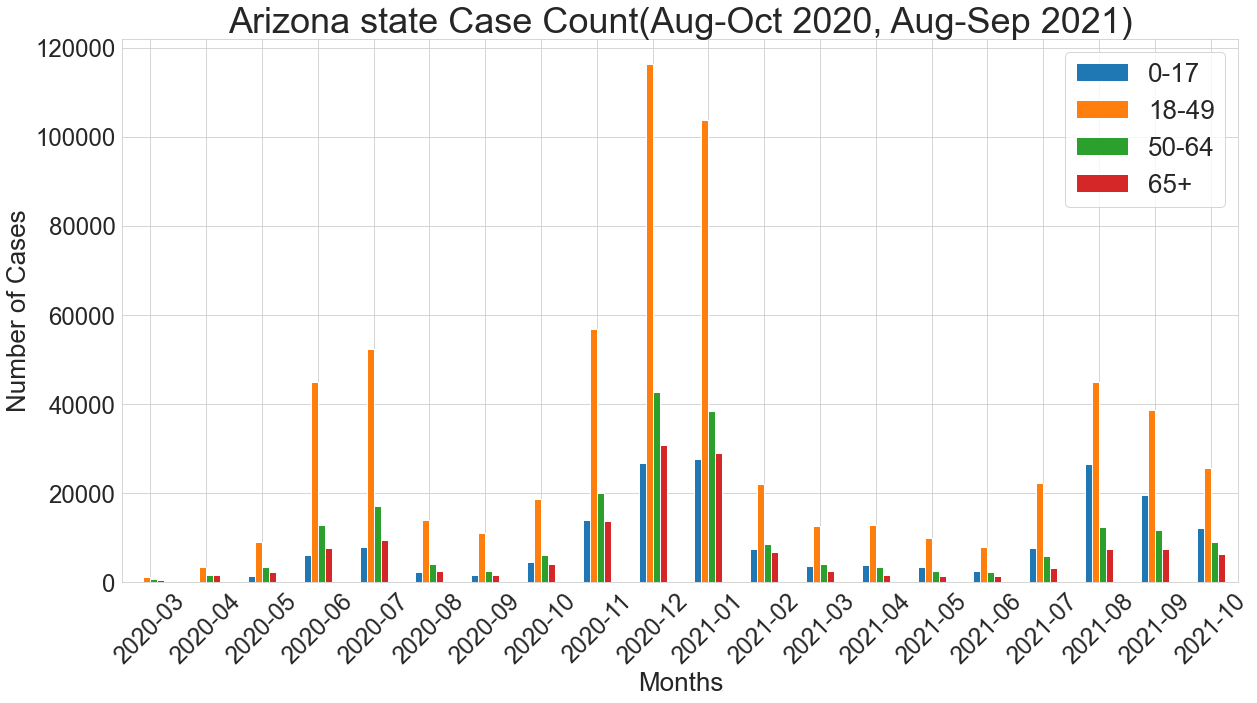

In [20]:
df_sum.plot(kind='bar', figsize=(20,10), rot=45)
plt.xlabel('Months', fontsize=26)
plt.ylabel('Number of Cases', fontsize = 26)
plt.title('Arizona state Case Count(Aug-Oct 2020, Aug-Sep 2021)', fontsize=36)
plt.tick_params(labelsize=24)
plt.legend(fontsize=26)

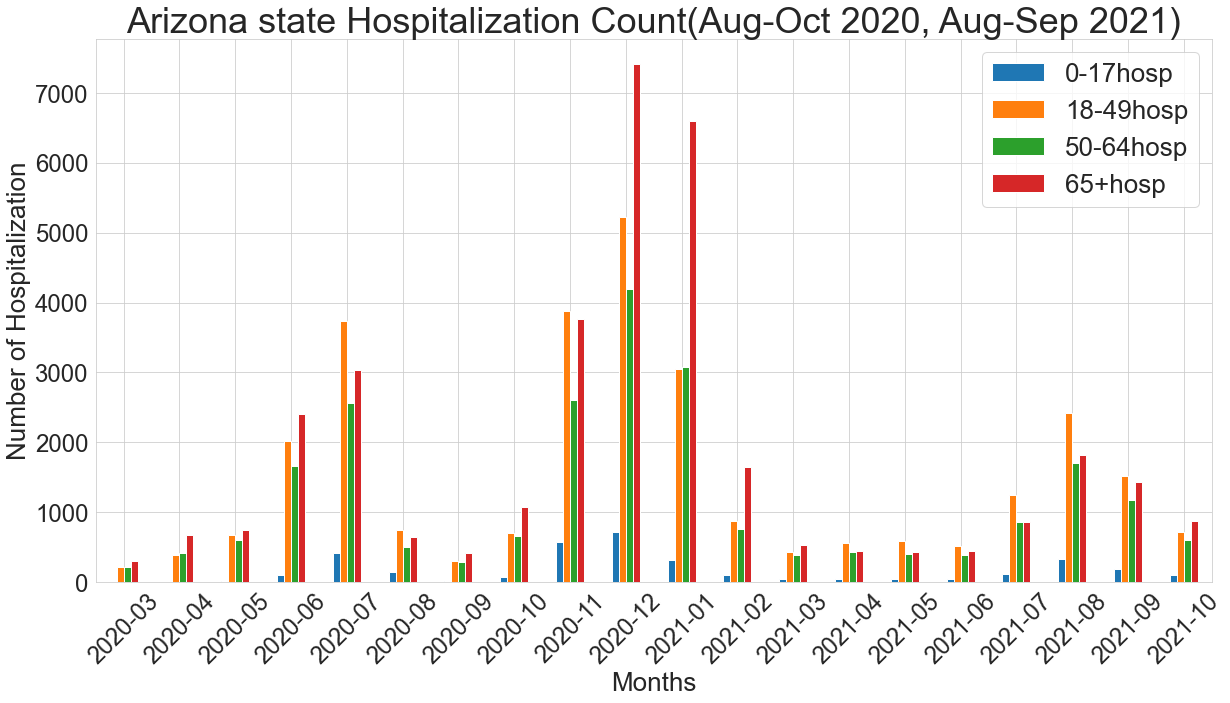

In [21]:
df_hosp.plot(kind='bar', figsize=(20,10), rot=45)
plt.xlabel('Months', fontsize=26)
plt.ylabel('Number of Hospitalization', fontsize = 26)
plt.title('Arizona state Hospitalization Count(Aug-Oct 2020, Aug-Sep 2021)', fontsize=36)
plt.tick_params(labelsize=24)
plt.legend(fontsize=26)

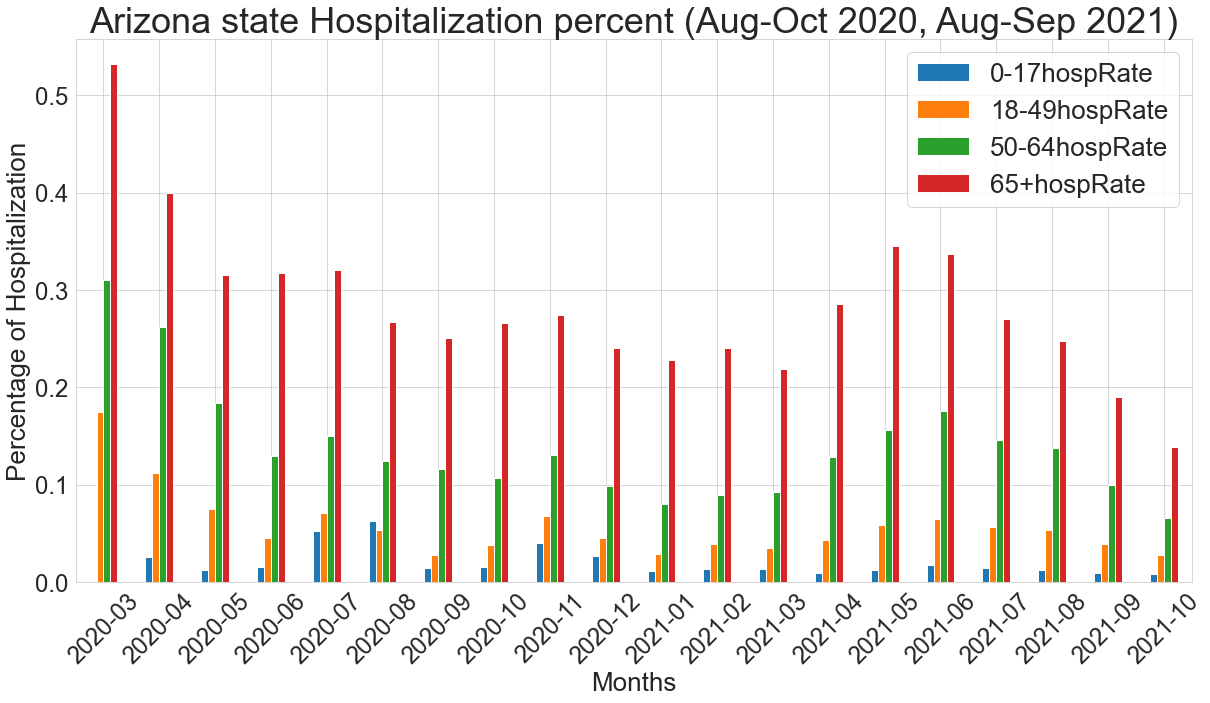

In [22]:
df_percent.plot(kind='bar', figsize=(20,10), rot=45)
plt.xlabel('Months', fontsize=26)
plt.ylabel('Percentage of Hospitalization', fontsize = 26)
plt.title('Arizona state Hospitalization percent (Aug-Oct 2020, Aug-Sep 2021)', fontsize=36)
plt.tick_params(labelsize=24)
plt.legend(fontsize=26)

Part B: Studying the children subset

In [25]:
azchildren_full = pd.read_csv('FullAZCDCData_0_17Only_Updated.csv')
azchildren_full

,case_month,res_state,state_fips_code,res_county,county_fips_code,age_group,sex,hosp_yn,icu_yn,death_yn,underlying_conditions_yn
0,2021-10,AZ,4,PINAL,4021.0,0 - 17 years,Female,No,Missing,Missing,NaN
1,2021-01,AZ,4,MOHAVE,4015.0,0 - 17 years,Female,No,Missing,NaN,NaN
2,2021-10,AZ,4,COCHISE,4003.0,0 - 17 years,Female,No,Missing,No,NaN
3,2021-10,AZ,4,PINAL,4021.0,0 - 17 years,Female,No,Missing,Missing,NaN
4,2021-01,AZ,4,MOHAVE,4015.0,0 - 17 years,Female,No,Missing,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...
179232,2021-07,AZ,4,NaN,NaN,0 - 17 years,NaN,No,Missing,Missing,NaN
179233,2021-07,AZ,4,NaN,NaN,0 - 17 years,NaN,No,Missing,No,NaN
179234,2021-07,AZ,4,NaN,NaN,0 - 17 years,NaN,No,Missing,Missing,NaN
179235,2021-07,AZ,4,NaN,NaN,0 - 17 years,NaN,No,Missing,Missing,NaN


In [26]:
#data cleaning
azchildren_full['hosp_yn'].loc[azchildren_full['hosp_yn'] == 'Missing'] = 'No'
azchildren_full['age_group'].loc[azchildren_full['age_group'] == 'Missing']= np.nan
azchildren_full = azchildren_full.dropna(subset=['hosp_yn'])
azchildren_full = azchildren_full.dropna(subset=['age_group'])
azchildren_full = azchildren_full[['case_month', 'age_group','hosp_yn']]

C:\Users\iamdo\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [27]:
azchildren_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179237 entries, 0 to 179236
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   case_month  179237 non-null  object
 1   age_group   179237 non-null  object
 2   hosp_yn     179237 non-null  object
dtypes: object(3)
memory usage: 3.4+ MB


Formatting the dataset into forms that easier to graph and conduct Chi test

In [28]:
months = azchildren_full['case_month'].unique()

In [38]:
data_full = {'month':  months,
        '0-17':sumCount('0 - 17 years', azchildren_full),
        '0-17hosp': hospCount('0 - 17 years', azchildren_full),
        '0-17nonhosp': nonhospCount('0 - 17 years', azchildren_full)  }
df_full = pd.DataFrame(data_full)
df_full['month'] = pd.to_datetime(df_full['month'].astype('string')).dt.strftime('%Y-%m')
df_full = df_full.sort_values(by = 'month')
df_full = df_full.set_index('month')
df_full['0-17percent'] = df_full['0-17hosp'] / df_full['0-17']
df_full['0-17log'] = np.log(df_full['0-17'].replace(0,np.nan))
df_full['0-17hosplog'] = np.log(df_full['0-17hosp'].replace(0,np.nan))
df_full

,0-17,0-17hosp,0-17nonhosp,0-17percent,0-17log,0-17hosplog
month,,,,,,
2020-03,15,0,15,0.000000,2.708050,NaN
2020-04,304,8,296,0.026316,5.717028,2.079442
2020-05,1389,17,1372,0.012239,7.236339,2.833213
2020-06,6165,95,6070,0.015410,8.726643,4.553877
2020-07,7946,416,7530,0.052353,8.980424,6.030685
2020-08,2294,145,2149,0.063208,7.738052,4.976734
2020-09,1495,22,1473,0.014716,7.309881,3.091042
2020-10,4481,71,4410,0.015845,8.407602,4.262680
2020-11,14000,570,13430,0.040714,9.546813,6.345636


Data visulization

In [30]:
x_ticks = df_full.index

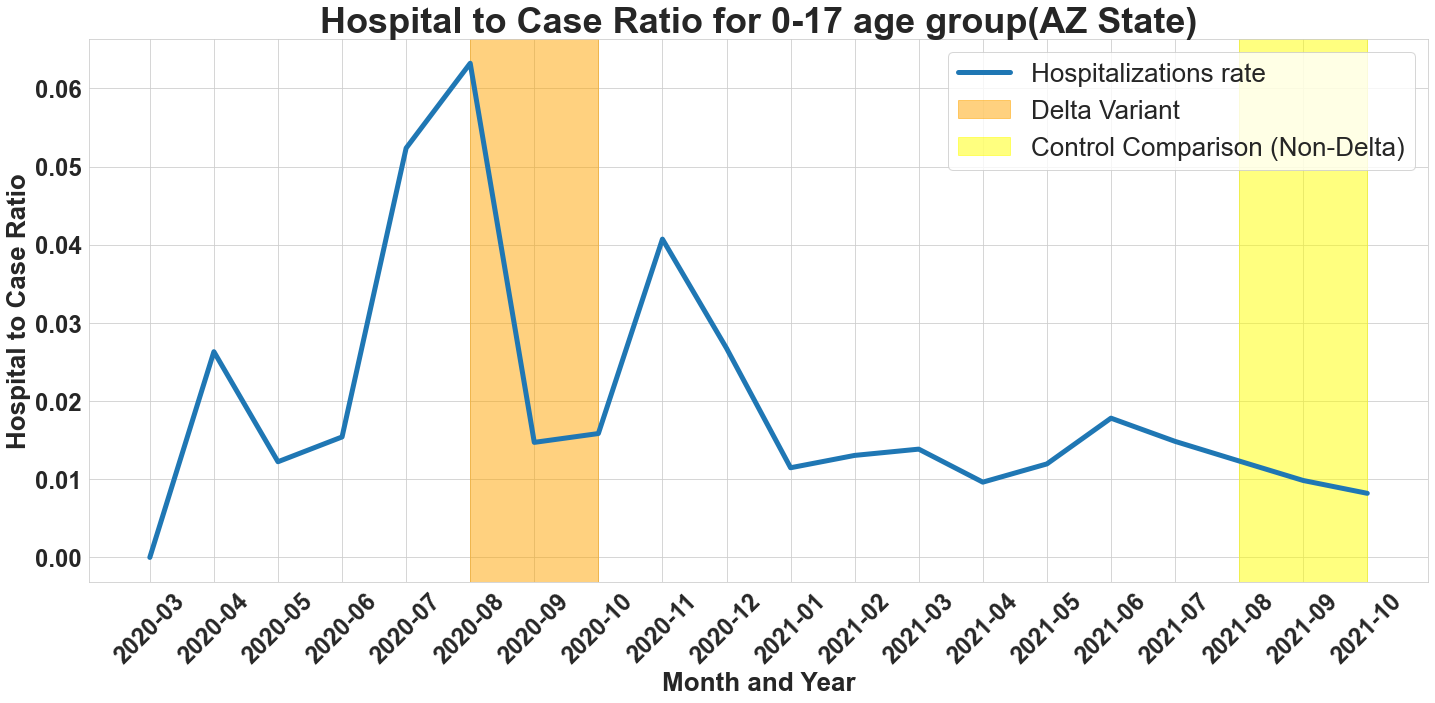

In [56]:
ax = df_full.plot(y=['0-17percent'],figsize=(24,10), rot=45, linewidth=5)

plt.xticks(np.arange(0,20,1), x_ticks,fontsize=24, fontweight='bold')
plt.yticks(fontsize=24, fontweight='bold')
#plt.yticks(np.arange(.2,3.9,.4),y_ticks,fontsize=18, fontweight='bold')

plt.ylabel('Hospital to Case Ratio', fontsize=26,fontweight='bold')
plt.xlabel('Month and Year', fontsize=26,fontweight='bold')

plt.axvspan(5, 7, color='orange', alpha=0.5,label=' Contol Comparison - Non-Delta')
plt.axvspan(17, 19, color='yellow', alpha=0.5,label='Delta')
plt.title('Hospital to Case Ratio for 0-17 age group(AZ State)',fontsize=36, fontweight='bold')
plt.legend(['Hospitalizations rate',
            'Delta Variant','Control Comparison (Non-Delta)'],fontsize=26)
plt.show()

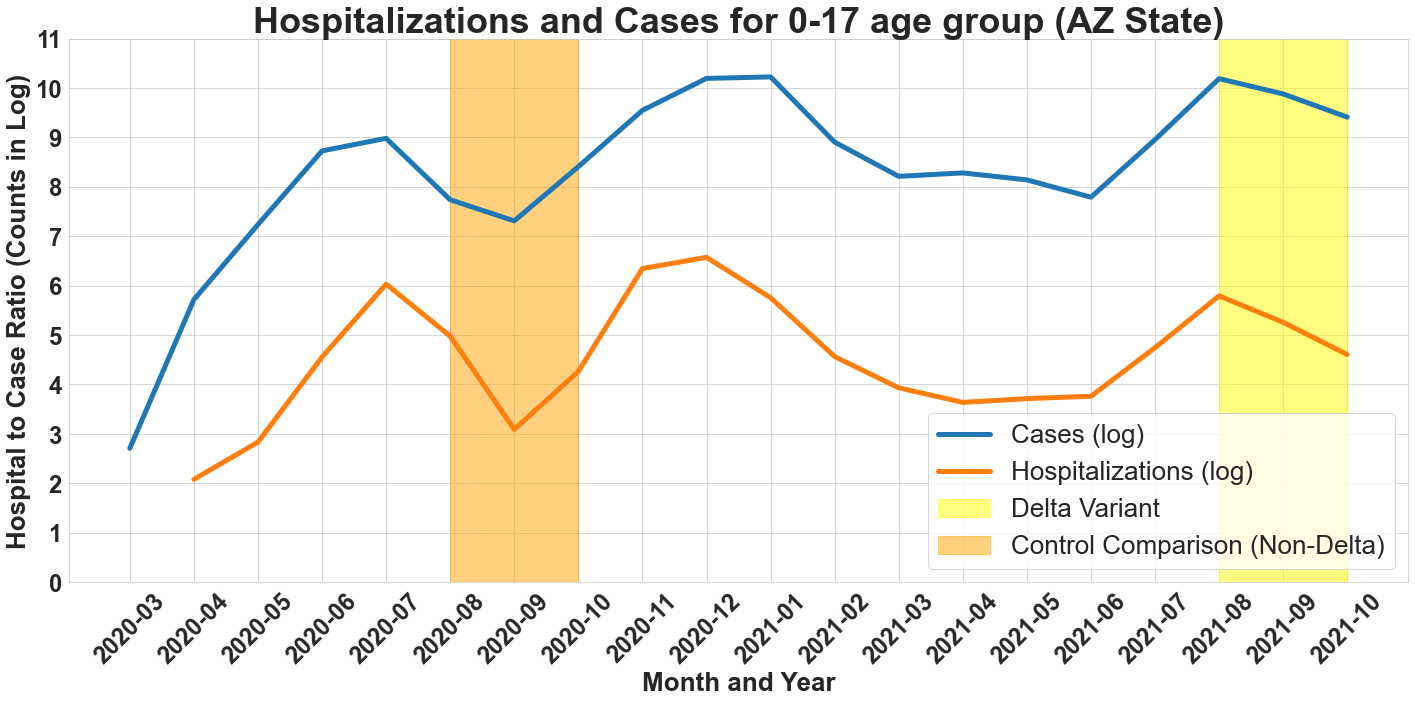

In [57]:
#compare cases and hospitalizations after taking the log 0-11
ax = df_full.plot(y=['0-17log','0-17hosplog'], rot=45,linewidth=5, figsize=(24,10))

plt.yticks(np.arange(0,12,1),fontsize=24, fontweight='bold')
plt.ylim([0,11])
plt.xticks(np.arange(0,20,1), x_ticks,fontsize=24, fontweight='bold')
plt.ylabel('Hospital to Case Ratio (Counts in Log)', fontsize=26,fontweight='bold')
plt.xlabel('Month and Year', fontsize=26,fontweight='bold')

plt.axvspan(17, 19, color='yellow', alpha=0.5,label='Delta')
plt.title('Hospitalizations and Cases for 0-17 age group (AZ State)',fontsize=36, fontweight='bold')

plt.axvspan(5, 7, color='orange', alpha=0.5,label=' Contol Comparison - Non-Delta')

plt.legend(['Cases (log)', 'Hospitalizations (log)','Delta Variant',
            'Control Comparison (Non-Delta)'],fontsize=26)

plt.show()

Conduct Chi Test

In [ ]:
#crossTab_0_19 = np.array([[Total_0_19_2020_Hosp, Total_0_19_2020_Cases], [Total_0_19_2021_Hosp, Total_0_19_2021_Cases]])
#print(crossTab_0_19)

In [106]:
hosp2020 = df_full.iloc[5,1] + df_full.iloc[6,1] + df_full.iloc[7,1]
nonhosp2020 = df_full.iloc[5,2] + df_full.iloc[6,2] + df_full.iloc[7,2]
hosprate2020 = round(hosp2020 / (hosp2020+nonhosp2020), 4)
hosp2021 = df_full.iloc[17,1] + df_full.iloc[18,1] + df_full.iloc[19,1]
nonhosp2021 = df_full.iloc[17,2] + df_full.iloc[18,2] + df_full.iloc[19,2]
hosprate2021 = round(hosp2021 / (hosp2021 + nonhosp2021), 4)

result_data = np.array([[hosp2020,nonhosp2020],
                       [hosp2021, nonhosp2021]])

table_data = np.array([['2020', hosp2020,nonhosp2020, hosprate2020],
                       ['2021', hosp2021, nonhosp2021, hosprate2021]])
table_df=pd.DataFrame(table_data, 
             columns=['year','hospCount','nonHospCount', 'hosprate'])
table_df

,year,hospCount,nonHospCount,hosprate
0,2020,238,8032,0.0288
1,2021,620,57679,0.0106


<AxesSubplot:>

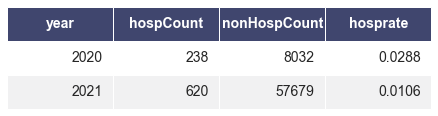

In [107]:
'''
Reference:
https://stackoverflow.com/questions/26678467/export-a-pandas-dataframe-as-a-table-image
'''
#conduct a table for the project presentation
import six
def render_mpl_table(data, col_width=3.0, row_height=0.625, font_size=14,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in  six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax

render_mpl_table(table_df, header_columns=0, col_width=1.9)

In [72]:
from scipy import stats
stats.chi2_contingency(result_data)

(185.97850817215294,
 2.3998503332154826e-42,
 1,
 array([[  106.5910559,  8163.4089441],
        [  751.4089441, 57547.5910559]]))

Since the p-value is  0.00 (below alpha of 0.05) and the hospitalization rate is lower for the delta group than the control group, we conclude that there are evidence show that the Delta variant was less dangerous to children in Arizona.
